In [3]:
#using Pkg
#Pkg.add("SpecialFunctions")
#using Pkg
#Pkg.add("FFTW")
using SpecialFunctions
using FFTW
using Plots

Your GR installation is incomplete. Rerunning build step for GR package.


┌ Info: Creating depsfile. GR provider is BinaryBuilder
│   provider = BinaryBuilder
│   depsfile = /home/bcl/.julia/packages/GR/SOvTP/deps/deps.jl
└ @ GR.Builder /home/bcl/.julia/packages/GR/SOvTP/deps/build.jl:119
┌ Info: GR was successfully rebuilt
└ @ GR /home/bcl/.julia/packages/GR/SOvTP/src/GR.jl:364


alpha is 30


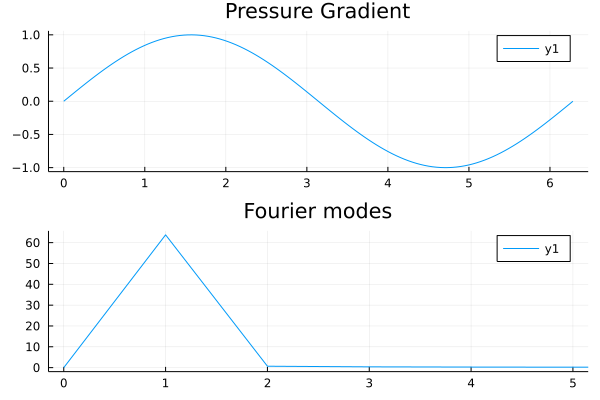

In [113]:
rho = 1.
nu = 1.
R = 1.
omega = 1.
#alpha = R * (omega*rho/nu)^0.5
alpha = 30
println("alpha is $alpha")
r = collect(range(0.,R,step=0.01))

N = 128
t = collect(range(0.,2π,length=N))
p = [(cos(x-π)+1)/2 for x in t]# + [2 for i in t]# + [(cos(13x-π)+1)/10 for x in t]
p = [(cos(x-π)+1)/2 for x in t] + [2 for i in t] + [cos(12x)/10 for x in t]
p = [sin(x) for x in t]# + [2 for i in t]# + [(cos(13x-π)+1)/10 for x in t]
p1 = plot(t, p, title="Pressure Gradient")

P = fft(p)
freq = 0:N-1
P = P[1:Int(N/2)-1]       # the signal to transform is real so the first N/2-1 freq are enough
freq = freq[1:Int(N/2)-1] # the signal to transform is real so the first N/2-1 freq are enough
p2 = plot(freq,abs.(P), title="Fourier modes", xlims=[0,5])#, ylims=[0,5])
N = Int(N/2)-1

plot(p1,p2,layout=(2,1))

┌ Info: Saved animation to 
│   fn = /home/bcl/Martino/julia_example/prova.gif
└ @ Plots /home/bcl/.julia/packages/Plots/PomtQ/src/animation.jl:114


Plots.AnimatedGif("/home/bcl/Martino/julia_example/prova.gif")
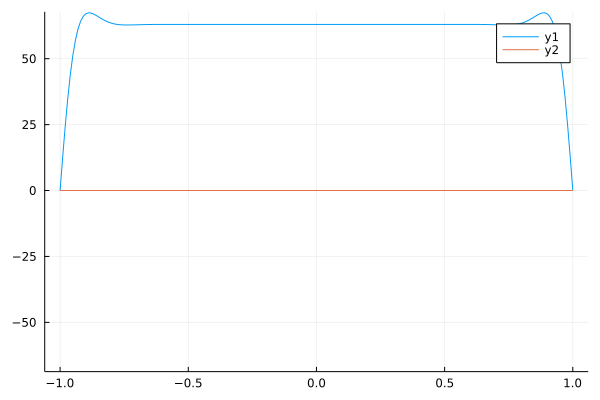

In [114]:
function lambda(n)
    alpha * n^(0.5) * im^(1.5)
end

function u_profile(r,t)
    result = Complex(real(P[1])/(4nu)*(R^2-r^2),0)
    for i=2:N
        #partial = (im*P[i])/(rho*(i-1)*omega) * ( 1. - besselj0(lambda(i-1)*r/R) / besselj0(lambda(i-1)) ) * exp(im*omega*(i-1)*t)
        partial = (im*P[i])/(rho*(i-1)*omega) * ( 1. - besselj0(lambda(i-1)*r/R) / besselj0(lambda(i-1)) ) * exp(im*(i-1)*t)
        #println(i, partial)
        result += partial
    end
    real(result)
end

function u_profile_poiselle(r)
    real(P[1])/(4nu)*(R^2-r^2)
end

u = Array{Float64}(undef,(length(r),length(t)))
up = Array{Float64}(undef,(length(r),length(t)))

for (ti,tt) in enumerate(t)
    for (ri,rr) in enumerate(r)
        u[ri,ti] = u_profile(rr, tt)
        up[ri,ti] = u_profile_poiselle(rr)
    end
end

using Plots
sr = vcat(-r[end:-1:1],r)
su = vcat(u[end:-1:1,:],u[:,:])
sup = vcat(up[end:-1:1,:],up[:,:])

anim = @animate for jj in 1:length(t)
    plot(sr, su[:,jj], ylims=(minimum(su),maximum(su)))
    plot!(sr, sup[:,jj], ylims=(minimum(su),maximum(su)))
end
gif(anim, "prova.gif", fps = 30)